<img src="images/ScDo-Bandeau_Lingua_Technologies.png" style="width: 100%;float:center;"/>

<h1 style="font-size:250%;text-align:center">Prédiction de l'évolution temporelle de la</h1>
<h1 style="font-size:250%;text-align:center">pandémie du COVID-19</h1>
<h1 style="font-size:250%;text-align:center">modèles prédictifs</h1>
<h4 style="font-size:150%;text-align:center">par Claude COULOMBE</h4>
<h5 style="font-size:100%;text-align:center">PhD, scientifique de données, consultant Lingua Technologies</h5>


<img src="images/ScDo-pandas_logo.png" width=400 />

Pour contrer l'anxiété de la pandémie de COVID-19, rien de mieux que d'agir. J'ai donc préparé un petit carnet Web Python, prétexte pour un petit exercice d'exploration de données avec Pandas. Maintenant un petit carnet web IPython avec des modèles prédictifs. 

**Attention!** Je ne suis pas épidémiologiste! Il s'agit d'un exercice «amateur» réalisé comme un loisir scientifique. Je suis ouvert à la discussion pour améliorer mes modèles et pour le plaisir d'apprendre. Aussi ces modèles ne sont bons que pour faire des prédictions à court terme. Par exemple. pour prédire un cycle épidémique, un modèle ARIMA ou d'ajustement de courbes doit disposer d'au moins un cycle complet de données. 

Une autre approche consisterait à se baser sur le comportement de l'épidémie en Chine et ajuster les paramètres aux données locales. J'ignore toutefois si cela donnerait des résultats fiables. 

**Note:** Pour faire des prédictions plus complètes et à plus long terme, des simulations avec des modèles mathématiques à base d'équations différentielles seraient plus appropriées (https://bit.ly/2JEMe3g). D'ailleurs certains paramètres de ces modèles peuvent être extraits des données. Pour avoir une idée du fonctionnment de tels modèles, avec des simulations-jouets, allez voir les capsules vidéos de Grant Sanderson (3Blue1Brown), mon infographiste scientifique préféré: https://bit.ly/33Umjhe

<hr style="height:1px">

**Références:**

COVID-19: Time Series Analysis With ARIMA Modelling<br/>
https://bit.ly/2xK3GAI

Epidemiology and ARIMA model of positive-rate of influenza viruses among children in Wuhan, China: A nine-year retrospective study<br/>
https://bit.ly/3dJAfiJ

Application of the ARIMA model on the COVID-2019 epidemic dataset<br/>
https://bit.ly/2xMfFNR

Forecasting of COVID-19 Confirmed Cases in Different Countries with ARIMA Models<br/>
https://bit.ly/2UTRe9b

<hr style="height:1px">

<h3><i>« Prédire est difficile, surtout lorsqu’il s’agit de l’avenir »</i></h3><br/>
<div style="margin-left:450px">proverbe danois</div>

<hr style="height:1px">

### Importation des bibliothèques utilisées

In [27]:
# Importation des bibliothèques
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pylab import *
%matplotlib inline

print("Bibliothèques importées!")

Bibliothèques importées!


## Données

### Dépôt de données ouvertes du COVID-19 - John Hopkins University


https://github.com/CSSEGISandData/COVID-19

<img src="" style="width: 100%;float:center;"/>

**Note** : Les données contenues dans le répertoire DATA doivent être mise à jour régulièrement pour refléter l'évolution de la pandémie dans le temps. 


### Lecture des données

Nous nous intéressons au fichier `time_series_19-covid-Confirmed.csv` qui contient les données sur les cas confirmés de COVID-19

wget --no-check-certificate https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv?raw=True -O time_series_covid19_confirmed_global.csv

In [28]:
# Note - bonne pratique de postfixer les Dataframe par _df (Rappel: Python n'est pas typé)
series_chronologiques_COVID19_df = pd.read_csv('DATA/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv',sep=',')


In [29]:
series_chronologiques_COVID19_df


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,12/15/20,12/16/20,12/17/20,12/18/20,12/19/20,12/20/20,12/21/20,12/22/20,12/23/20,12/24/20
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,48952,49161,49378,49621,49681,49817,50013,50190,50433,50655
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,50000,50637,51424,52004,52542,53003,53425,53814,54317,54827
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,93065,93507,93933,94371,94781,95203,95659,96069,96549,97007
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,7382,7446,7466,7519,7560,7577,7602,7633,7669,7699
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,16362,16407,16484,16562,16626,16644,16686,16802,16931,17029
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266,NaN,Vietnam,14.058324,108.277199,0,2,2,2,2,2,...,1405,1405,1407,1410,1411,1413,1414,1420,1421,1432
267,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,113409,115606,117755,119612,121216,122643,123945,125506,127376,129080
268,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,2085,2085,2087,2087,2087,2087,2087,2087,2087,2092
269,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,18428,18456,18504,18575,18620,18716,18768,18881,19122,19234


### Retrait d'attributs «superflus»

Puisque nous nous intéressons à l'évolution du nombre de malades dans le temps, certains attributs (colonnes du tableau de données) sont superflus ou «inutiles» et alourdissent notre analyse.

Ci-dessous une liste d'attributs à retirer:

In [30]:
attributs_a_retirer = ["Lat","Long"]


Retirer les attributs «superflus» avec la fonction `.drop()`

In [31]:
series_chronologiques_COVID19_df = series_chronologiques_COVID19_df.drop(attributs_a_retirer,axis='columns')


In [32]:
series_chronologiques_COVID19_df.head()


,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,12/15/20,12/16/20,12/17/20,12/18/20,12/19/20,12/20/20,12/21/20,12/22/20,12/23/20,12/24/20
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,48952,49161,49378,49621,49681,49817,50013,50190,50433,50655
1,NaN,Albania,0,0,0,0,0,0,0,0,...,50000,50637,51424,52004,52542,53003,53425,53814,54317,54827
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,93065,93507,93933,94371,94781,95203,95659,96069,96549,97007
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,7382,7446,7466,7519,7560,7577,7602,7633,7669,7699
4,NaN,Angola,0,0,0,0,0,0,0,0,...,16362,16407,16484,16562,16626,16644,16686,16802,16931,17029


#### Maintenant, examinons les données pour les différentes provinces canadiennes.

In [33]:
series_chronologiques_COVID19_df[series_chronologiques_COVID19_df['Country/Region']=="Canada"]


,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,12/15/20,12/16/20,12/17/20,12/18/20,12/19/20,12/20/20,12/21/20,12/22/20,12/23/20,12/24/20
39,Alberta,Canada,0,0,0,0,0,0,0,0,...,83327,84597,86168,87581,88933,90219,91459,92480,93781,93781
40,British Columbia,Canada,0,0,0,0,0,0,1,1,...,43463,44103,44776,45400,45400,45400,47067,47510,48027,48609
41,Diamond Princess,Canada,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
42,Grand Princess,Canada,0,0,0,0,0,0,0,0,...,13,13,13,13,13,13,13,13,13,13
43,Manitoba,Canada,0,0,0,0,0,0,0,0,...,21535,21826,22047,22397,22630,22859,23025,23180,23381,23624
44,New Brunswick,Canada,0,0,0,0,0,0,0,0,...,559,567,573,573,578,574,578,580,585,587
45,Newfoundland and Labrador,Canada,0,0,0,0,0,0,0,0,...,359,364,367,372,380,382,382,383,384,384
46,Northwest Territories,Canada,0,0,0,0,0,0,0,0,...,22,22,23,24,24,24,24,24,24,24
47,Nova Scotia,Canada,0,0,0,0,0,0,0,0,...,1426,1430,1436,1443,1445,1445,1447,1454,1458,1465
48,Nunavut,Canada,0,0,0,0,0,0,0,0,...,258,258,259,259,259,259,262,262,264,265


### Création d'une entrée supplémentaire spécifique pour le Québec (avec accent aigu) 

In [34]:
quebec_df = series_chronologiques_COVID19_df[(series_chronologiques_COVID19_df['Country/Region']=="Canada") & 
                                (series_chronologiques_COVID19_df['Province/State']=="Quebec")]

quebec_df.loc[51,'Country/Region'] = 'Québec'
quebec_df.loc[51,'Province/State'] = np.nan

series_chronologiques_COVID19_df = series_chronologiques_COVID19_df.append(quebec_df , ignore_index=True)
series_chronologiques_COVID19_df


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,12/15/20,12/16/20,12/17/20,12/18/20,12/19/20,12/20/20,12/21/20,12/22/20,12/23/20,12/24/20
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,48952,49161,49378,49621,49681,49817,50013,50190,50433,50655
1,NaN,Albania,0,0,0,0,0,0,0,0,...,50000,50637,51424,52004,52542,53003,53425,53814,54317,54827
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,93065,93507,93933,94371,94781,95203,95659,96069,96549,97007
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,7382,7446,7466,7519,7560,7577,7602,7633,7669,7699
4,NaN,Angola,0,0,0,0,0,0,0,0,...,16362,16407,16484,16562,16626,16644,16686,16802,16931,17029
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267,NaN,West Bank and Gaza,0,0,0,0,0,0,0,0,...,113409,115606,117755,119612,121216,122643,123945,125506,127376,129080
268,NaN,Yemen,0,0,0,0,0,0,0,0,...,2085,2085,2087,2087,2087,2087,2087,2087,2087,2092
269,NaN,Zambia,0,0,0,0,0,0,0,0,...,18428,18456,18504,18575,18620,18716,18768,18881,19122,19234
270,NaN,Zimbabwe,0,0,0,0,0,0,0,0,...,11522,11749,11866,12047,12151,12325,12422,12544,12656,12786


### Regroupement des données des états et provinces
**Note** : Pour avoir un total par pays, nous allons regrouper les états et les provinces d'un même pays. Utilisaton des fonctions `.groupby()` et `.sum()`. Aussi `.reset_index()`

In [35]:
series_chronologiques_COVID19_df = series_chronologiques_COVID19_df.groupby(['Country/Region']).sum().reset_index()


Vérifions que le regroupement est bien effectué, avec les données sur le Canada.

In [36]:
series_chronologiques_COVID19_df[series_chronologiques_COVID19_df['Country/Region']=="Canada"]


,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,12/15/20,12/16/20,12/17/20,12/18/20,12/19/20,12/20/20,12/21/20,12/22/20,12/23/20,12/24/20
32,Canada,0,0,0,0,1,1,2,2,2,...,479064,485576,492582,499282,505741,511748,519325,525585,532506,538183


In [37]:
series = series_chronologiques_COVID19_df[series_chronologiques_COVID19_df['Country/Region']=="Québec"]
series


,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,12/15/20,12/16/20,12/17/20,12/18/20,12/19/20,12/20/20,12/21/20,12/22/20,12/23/20,12/24/20
140,Québec,0,0,0,0,0,0,0,0,0,...,167276,169173,171028,172801,174839,176985,179093,181276,183523,185872


In [38]:
# Correction d'une erreur dans les données du 4 avril 2020
series_chronologiques_COVID19_df.loc[137,'4/4/20']=6997
series_chronologiques_COVID19_df[series_chronologiques_COVID19_df['Country/Region']=="Québec"]


,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,12/15/20,12/16/20,12/17/20,12/18/20,12/19/20,12/20/20,12/21/20,12/22/20,12/23/20,12/24/20
140,Québec,0,0,0,0,0,0,0,0,0,...,167276,169173,171028,172801,174839,176985,179093,181276,183523,185872


# Modèles prédictifs



## L'évolution de l'épidémie au Québec
Pour des raisons évidente d'intérêt, je me concentrerai sur la prévision de l'évolution de l'épidémie au Québec

Rappel de la série chonologique 

In [39]:
print(list(series))


['Country/Region', '1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20', '1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20', '2/6/20', '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20', '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20', '2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20', '2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20', '3/1/20', '3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20', '3/7/20', '3/8/20', '3/9/20', '3/10/20', '3/11/20', '3/12/20', '3/13/20', '3/14/20', '3/15/20', '3/16/20', '3/17/20', '3/18/20', '3/19/20', '3/20/20', '3/21/20', '3/22/20', '3/23/20', '3/24/20', '3/25/20', '3/26/20', '3/27/20', '3/28/20', '3/29/20', '3/30/20', '3/31/20', '4/1/20', '4/2/20', '4/3/20', '4/4/20', '4/5/20', '4/6/20', '4/7/20', '4/8/20', '4/9/20', '4/10/20', '4/11/20', '4/12/20', '4/13/20', '4/14/20', '4/15/20', '4/16/20', '4/17/20', '4/18/20', '4/19/20', '4/20/20', '4/21/20', '4/22/2

In [40]:
def parser(x):
    return pd.datetime.strptime(x, '%m/%d/%y')

series_raw = series_chronologiques_COVID19_df[series_chronologiques_COVID19_df['Country/Region']=='Québec']
print(series_raw)
dates_list = [parser(x) for x in list(series_raw.columns[1:])]
values_list = list((series_raw.values)[0][1:])
# Ici au besoin, on peut ajouter manuellement un nouveau point de données
# lignes commentées
# values_list += [15857]
# dates_list += [parser('4/16/20')]                     
print("-"*90)
print("values_list[-10:]:")
print(list(values_list[-10:]))
print("*"*90)
print("dates_list[-10:]:")
print(dates_list[-10:])
print("-"*90)
series = pd.Series(values_list,index=dates_list)
series.index.name = 'date'
print("series[-10:]:")
print(list(series)[-10:])
print("-"*90)
print("series.index[-10:]:")
print(list(series.index)[-10:])
print("*"*90)


    Country/Region  1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  \
140         Québec        0        0        0        0        0        0   

     1/28/20  1/29/20  1/30/20  ...  12/15/20  12/16/20  12/17/20  12/18/20  \
140        0        0        0  ...    167276    169173    171028    172801   

     12/19/20  12/20/20  12/21/20  12/22/20  12/23/20  12/24/20  
140    174839    176985    179093    181276    183523    185872  

[1 rows x 339 columns]
------------------------------------------------------------------------------------------
values_list[-10:]:
[167276, 169173, 171028, 172801, 174839, 176985, 179093, 181276, 183523, 185872]
******************************************************************************************
dates_list[-10:]:
[datetime.datetime(2020, 12, 15, 0, 0), datetime.datetime(2020, 12, 16, 0, 0), datetime.datetime(2020, 12, 17, 0, 0), datetime.datetime(2020, 12, 18, 0, 0), datetime.datetime(2020, 12, 19, 0, 0), datetime.datetime(2020, 12, 20, 0, 0

### Affichage de la progression temporelle du nombre de malades confirmés

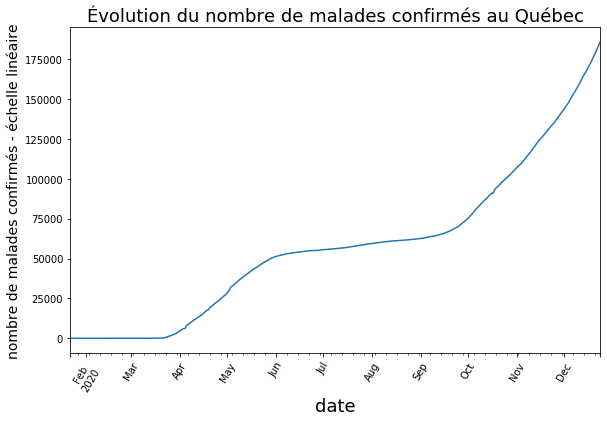

In [41]:
nombre_dor = 1.618
hauteur = 12
longueur = int(nombre_dor * hauteur)

plt.figure(figsize=(longueur/2,hauteur/2))
series.plot()
plt.title("Évolution du nombre de malades confirmés au Québec",fontsize=18)
plt.xlabel("date",fontsize=18)
plt.ylabel("nombre de malades confirmés - échelle linéaire",fontsize=14)
xticks(rotation=60)
plt.show()


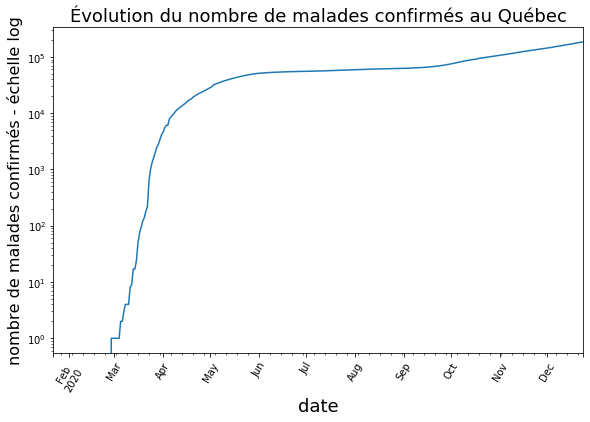

In [42]:
fig, ax = plt.subplots(figsize=(longueur/2,hauteur/2))
xticks(rotation=60)
ax.set_yscale('log')
series.plot()
plt.title("Évolution du nombre de malades confirmés au Québec",fontsize=18)
plt.xlabel("date",fontsize=18)
plt.ylabel("nombre de malades confirmés - échelle log",fontsize=16)
xticks(rotation=60)
plt.show()


## Modèle ARIMA

Une méthode statistique populaire pour la prévision des séries chronologiques est le modèle ARIMA, un acronyme qui signifie AutoRegressive Integrated Moving Average, en français modèle de moyenne mobile autorégressive. Il s'agit d'une classe de modèle qui capture une suite de différentes structures temporelles dans les données d'une série chronologique. 

Trois hyperparamètres contrôlent l'algorithme ARIMA 

* p: l'ordre du modèle autorégressif (correspond au nombre de périodes antérieuses considérées)
* d: le degré de différenciation des observations brutes (soustraction d'une observation au temps t à une observation à la période de temps précédente t-1) afin de rendre la série chronologique stationnaire
* q: l'ordre de la moyenne mobile (dépendance entre une observation et l'erreur résiduelle d'une moyenne mobile apppliquée aux observations antérieures) 

Référence : 

* https://en.wikipedia.org/wiki/Autoregressive_integrated_moving_average

* https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/


### Autocorrélation
Nous pouvons calculer la corrélation pour les observations de séries chronologiques avec des observations avec des périodes de temps précédentes, appelés périodes antérieures (en anglais, lag). Étant donné que la corrélation des observations de la série chronologique est calculée avec des valeurs de la même série à des périodes antérieures, cela s'appelle une autocorrélation, (en anglais. Autocorrelation Function, ACF).

Ci-dessous, calcul et affichage de l'autocorrélation avec la fonction `.autocorrelation_plot()` de la bibliothèque Pandas.

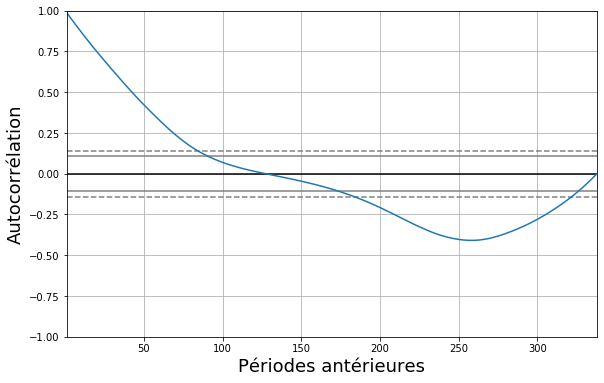

In [43]:
from pandas import read_csv
from pandas import datetime
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot

plt.figure(figsize=(longueur/2,hauteur/2))
autocorrelation_plot(series)
plt.xlabel(u'Périodes antérieures',fontsize=18)
plt.ylabel(u'Autocorrélation',fontsize=18)
plt.show()


Le même calcul et affichage de l'autocorrélation avec la fonction `.plot_acf()` de la bibliothèque statsmodels.

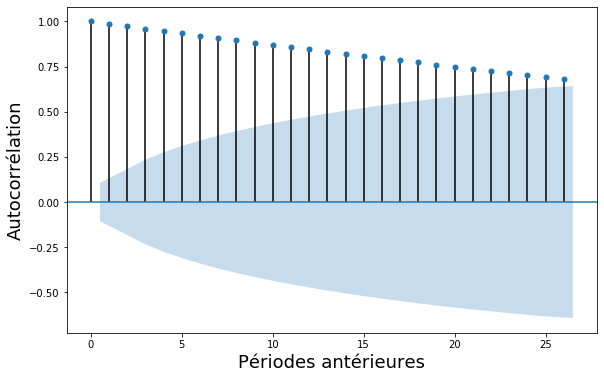

In [44]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
fig, ax = plt.subplots(figsize=(longueur/2,hauteur/2))
plot_acf(series,title='',ax=ax)
plt.xlabel(u'Périodes antérieures',fontsize=18)
plt.ylabel(u'Autocorrélation',fontsize=18)
plt.show()


### Autocorrélation partielle
Une autocorrélation partielle (en anglais. Partial Autocorrelation Function, PACF) est un résumé de la relation entre une observation dans une série chronologique avec des observations à des périodes antérieures en supprimant les relations des observations intermédiaires. Utilisation de avec la fonction `.plot_pacf()` de la bibliothèque statsmodels.

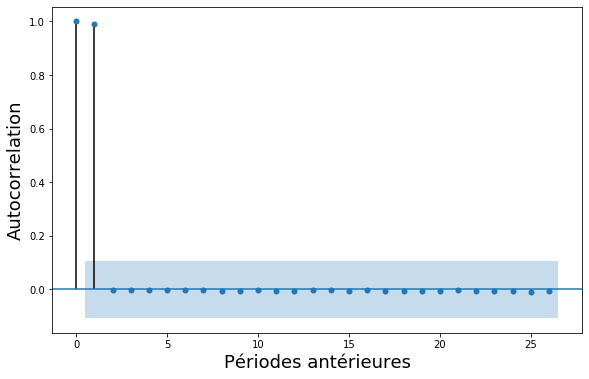

In [45]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_pacf
fig, ax = plt.subplots(figsize=(longueur/2,hauteur/2))
try:
    plot_pacf(series,title='',ax=ax)
    plt.xlabel(u'Périodes antérieures',fontsize=18)
    plt.ylabel(u'Autocorrelation',fontsize=18)
    plt.show()
except:
    print("Matrice singulière")
    # Ajout de bruit
    series = series+1.0e-09*np.random.rand(series.shape[0])
    plot_pacf(series,title='',ax=ax)
    plt.xlabel(u'Périodes antérieures',fontsize=18)
    plt.ylabel(u'Autocorrelation',fontsize=18)
    plt.show()


### Auto ARIMA

Auto ARIMA calcule les meilleurs modèles ARIMA à partir des données et de contraintes sur les hyperparamètres (p,d,q) de ARIMA selon diférents critères comme le <a href="https://fr.wikipedia.org/wiki/Crit%C3%A8re_d%27information_d%27Akaike">critère d'information d'Akaike</a> (Akaike information criterion ou AIC) 

Installer la bibliothèque Python auto_arima

#> sudo pip3 install pyramid-arima - deprecated

   > sudo pip3 install pmdarima
   
Documentation: https://alkaline-ml.com/pmdarima/0.9.0/tips_and_tricks.html#tips-and-tricks

Prise en main rapide: https://alkaline-ml.com/pmdarima/0.9.0/quickstart.html


In [46]:
from io import StringIO
import sys

sortie_standard = sys.stdout
sortie_autoarima = StringIO()
sys.stdout =  sortie_autoarima

# import pyramid as pm - deprecated
import pmdarima as pm
print("pmdarima version:",pm.__version__)
print()
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Entraîner auto-ARIMA
meilleur_ARIMA = pm.auto_arima(series, start_p=1, start_q=1,
                               max_p=3, max_q=3, m=100,
                               start_P=0, seasonal=False,
                               d=1, D=1, trace=True,
                               error_action='ignore',  # pas de message d'erreur sur
                               suppress_warnings=True, # pas de message de non convergence
                               stepwise=True)  # calcul pas à pas

# Restaurer la sortie standard
sys.stdout = sortie_standard

# Récupérer la sortie autoarima 
sortie_autoarima_str = sortie_autoarima.getvalue()

print(sortie_autoarima_str)

meilleur_ARIMA.summary()


/usr/local/lib/python3.6/dist-packages/pmdarima/arima/_validation.py:60: UserWarning: m (100) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


pmdarima version: 1.7.1

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=4527.163, Time=0.68 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=5240.133, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=4699.737, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=5024.032, Time=0.18 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=5459.463, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=4512.116, Time=0.55 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=4583.659, Time=0.11 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=4504.520, Time=0.93 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=inf, Time=0.44 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=4502.646, Time=1.07 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=4501.626, Time=1.27 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=4502.541, Time=0.82 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=4504.331, Time=1.82 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=4500.553, Time=1.45 sec
 ARIMA(0,1,3)

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  338
Model:               SARIMAX(1, 1, 3)   Log Likelihood               -2244.718
Date:                Fri, 25 Dec 2020   AIC                           4499.436
Time:                        01:12:39   BIC                           4518.537
Sample:                             0   HQIC                          4507.049
                                - 338                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0000      0.004    259.464      0.000       0.992       1.008
ma.L1         -0.9282      0.028    -33.370      0.000      -0.983      -0.874
ma.L2          0.2042      0.043      4.695      0.000       0.119       0.289
ma.L3          0.1089      0.042      2.597      0.009       0.027       0.191
sigma2      3.537e+04   1092.058     32.391      0.000    3.32e+04    3.75e+04
===================================================================================
Ljung-Box (Q):                       48.02   Jarque-Bera (JB):              6562.90
Prob(Q):                              0.18   Prob(JB):                         0.00
Heteroskedasticity (H):               1.01   Skew:                             2.26
Prob(H) (two-sided):                  0.97   Kurtosis:                        24.14
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [47]:
import re

liste_resultats_ARIMA = sortie_autoarima_str.split('\n')
# motif_extraction = "order=\((\d),\s(\d),\s(\d)\);\s*AIC=(\d*\.\d*|nan)" 
motif_extraction = "ARIMA\((\d),(\d),(\d)\).*AIC=(\d*\.\d*|nan)" 

p = re.compile(motif_extraction)

meilleurs_ARIMA_dict = {}
for resultat_ARIMA_brut in liste_resultats_ARIMA:
    if p.findall(resultat_ARIMA_brut):
        resultat_ARIMA = p.findall(resultat_ARIMA_brut)[0]
        arima_etiq = "_".join(resultat_ARIMA[:3])
        aic = resultat_ARIMA[3]
        if aic == "nan":
            aic = 10000000
        meilleurs_ARIMA_dict[arima_etiq]=int(float(aic))
meilleurs_ARIMA_list = list({k: v for k, v in sorted(meilleurs_ARIMA_dict.items(), key=lambda item: item[1])})
#meilleurs_ARIMA_list[:2]

meilleurs_ARIMA = []
#for meilleur_arima in meilleurs_ARIMA_list[:2]:
for meilleur_arima in meilleurs_ARIMA_list:
    print(meilleur_arima.split('_'))
    meilleurs_ARIMA += [tuple([int(carac) for carac in meilleur_arima.split('_')])]
meilleurs_ARIMA


['1', '1', '3']
['2', '1', '2']
['1', '1', '2']
['3', '1', '2']
['2', '1', '3']
['3', '1', '1']
['2', '1', '1']
['1', '1', '1']
['2', '1', '0']
['1', '1', '0']
['0', '1', '3']
['0', '1', '1']
['0', '1', '2']
['0', '1', '0']


[(1, 1, 3),
 (2, 1, 2),
 (1, 1, 2),
 (3, 1, 2),
 (2, 1, 3),
 (3, 1, 1),
 (2, 1, 1),
 (1, 1, 1),
 (2, 1, 0),
 (1, 1, 0),
 (0, 1, 3),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 0)]

In [48]:
meilleurs_ARIMA

[(1, 1, 3),
 (2, 1, 2),
 (1, 1, 2),
 (3, 1, 2),
 (2, 1, 3),
 (3, 1, 1),
 (2, 1, 1),
 (1, 1, 1),
 (2, 1, 0),
 (1, 1, 0),
 (0, 1, 3),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 0)]

### Entraînement du meilleur modèle ARIMA

Le critère de sélection selon le <a href="https://fr.wikipedia.org/wiki/Crit%C3%A8re_d%27information_d%27Akaike">critère d'information d'Akaike</a> (Akaike information criterion ou AIC). On ne conserve que les deux ou trois meilleurs modèles ARIMAselon ce critère qui doit être minimisé.

Certains modèles ARIMA sont retirés car ils ne convergent pas (`LinAlgError: SVD did not converge`) ou parce que le modèle n'est pas stationnaire.

Taille du jeu de données de test= 103
******************************************************************************************
Modèle ARIMA: (1, 1, 3)
Nombre de jours écoulés=198, t=0, prédiction=64908, vraie valeur=64986
Nombre de jours écoulés=199, t=1, prédiction=65206, vraie valeur=65262
Nombre de jours écoulés=200, t=2, prédiction=65507, vraie valeur=65554
Nombre de jours écoulés=201, t=3, prédiction=65821, vraie valeur=65857
Nombre de jours écoulés=202, t=4, prédiction=66141, vraie valeur=66356
Nombre de jours écoulés=203, t=5, prédiction=66670, vraie valeur=66653
Nombre de jours écoulés=204, t=6, prédiction=67007, vraie valeur=67080
Nombre de jours écoulés=205, t=7, prédiction=67458, vraie valeur=67542
Nombre de jours écoulés=206, t=8, prédiction=67936, vraie valeur=68128
Nombre de jours écoulés=207, t=9, prédiction=68560, vraie valeur=68617
Nombre de jours écoulés=208, t=10, prédiction=69094, vraie valeur=69088
Nombre de jours écoulés=209, t=11, prédiction=69592, vraie valeur

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:220: RuntimeWarning: divide by zero encountered in true_divide
  Z_mat, R_mat, T_mat)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/tsatools.py:689: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/tsatools.py:689: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/tsatools.py:690: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/tsatools.py:690: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()


Nombre de jours écoulés=290, t=92, prédiction=165705, vraie valeur=165535
Nombre de jours écoulés=291, t=93, prédiction=167384, vraie valeur=167276
Nombre de jours écoulés=292, t=94, prédiction=169104, vraie valeur=169173
Nombre de jours écoulés=293, t=95, prédiction=170959, vraie valeur=171028
Nombre de jours écoulés=294, t=96, prédiction=172815, vraie valeur=172801
Nombre de jours écoulés=295, t=97, prédiction=174603, vraie valeur=174839
Nombre de jours écoulés=296, t=98, prédiction=176653, vraie valeur=176985
*** Erreur! ***
Modèle ARIMA: (2, 1, 2)
Nombre de jours écoulés=198, t=0, prédiction=64908, vraie valeur=64986
Nombre de jours écoulés=199, t=1, prédiction=65207, vraie valeur=65262
Nombre de jours écoulés=200, t=2, prédiction=65507, vraie valeur=65554
Nombre de jours écoulés=201, t=3, prédiction=65820, vraie valeur=65857
Nombre de jours écoulés=202, t=4, prédiction=66140, vraie valeur=66356
Nombre de jours écoulés=203, t=5, prédiction=66666, vraie valeur=66653
Nombre de jours 

Nombre de jours écoulés=218, t=20, prédiction=77134, vraie valeur=77380
Nombre de jours écoulés=219, t=21, prédiction=78326, vraie valeur=78459
Nombre de jours écoulés=220, t=22, prédiction=79479, vraie valeur=79650
Nombre de jours écoulés=221, t=23, prédiction=80717, vraie valeur=81014
Nombre de jours écoulés=222, t=24, prédiction=82153, vraie valeur=81914
Nombre de jours écoulés=223, t=25, prédiction=83105, vraie valeur=82992
Nombre de jours écoulés=224, t=26, prédiction=84093, vraie valeur=84094
Nombre de jours écoulés=225, t=27, prédiction=85156, vraie valeur=85191
Nombre de jours écoulés=226, t=28, prédiction=86248, vraie valeur=86133
Nombre de jours écoulés=227, t=29, prédiction=87180, vraie valeur=86976
Nombre de jours écoulés=228, t=30, prédiction=87961, vraie valeur=87791
Nombre de jours écoulés=229, t=31, prédiction=88691, vraie valeur=88994
Nombre de jours écoulés=230, t=32, prédiction=89870, vraie valeur=89963
Nombre de jours écoulés=231, t=33, prédiction=90926, vraie valeu

Nombre de jours écoulés=205, t=7, prédiction=67463, vraie valeur=67542
Nombre de jours écoulés=206, t=8, prédiction=67930, vraie valeur=68128
Nombre de jours écoulés=207, t=9, prédiction=68558, vraie valeur=68617
Nombre de jours écoulés=208, t=10, prédiction=69092, vraie valeur=69088
Nombre de jours écoulés=209, t=11, prédiction=69593, vraie valeur=69670
Nombre de jours écoulés=210, t=12, prédiction=70179, vraie valeur=70307
Nombre de jours écoulés=211, t=13, prédiction=70835, vraie valeur=71005
Nombre de jours écoulés=212, t=14, prédiction=71576, vraie valeur=71901
Nombre de jours écoulés=213, t=15, prédiction=72544, vraie valeur=72651
Nombre de jours écoulés=214, t=16, prédiction=73375, vraie valeur=73450
Nombre de jours écoulés=215, t=17, prédiction=74233, vraie valeur=74288
Nombre de jours écoulés=216, t=18, prédiction=75089, vraie valeur=75221
Nombre de jours écoulés=217, t=19, prédiction=76047, vraie valeur=76273
Nombre de jours écoulés=218, t=20, prédiction=77145, vraie valeur=7

Nombre de jours écoulés=227, t=29, prédiction=87181, vraie valeur=86976
Nombre de jours écoulés=228, t=30, prédiction=87966, vraie valeur=87791
Nombre de jours écoulés=229, t=31, prédiction=88694, vraie valeur=88994
Nombre de jours écoulés=230, t=32, prédiction=89899, vraie valeur=89963
Nombre de jours écoulés=231, t=33, prédiction=90910, vraie valeur=91018
Nombre de jours écoulés=232, t=34, prédiction=92035, vraie valeur=91018
Nombre de jours écoulés=233, t=35, prédiction=91868, vraie valeur=93391
Nombre de jours écoulés=234, t=36, prédiction=94009, vraie valeur=94429
Nombre de jours écoulés=235, t=37, prédiction=95424, vraie valeur=95216
Nombre de jours écoulés=236, t=38, prédiction=96574, vraie valeur=96288
Nombre de jours écoulés=237, t=39, prédiction=97391, vraie valeur=97321
Nombre de jours écoulés=238, t=40, prédiction=98326, vraie valeur=98226
Nombre de jours écoulés=239, t=41, prédiction=99240, vraie valeur=99235
Nombre de jours écoulés=240, t=42, prédiction=100216, vraie vale

Nombre de jours écoulés=214, t=16, prédiction=73336, vraie valeur=73450
Nombre de jours écoulés=215, t=17, prédiction=74165, vraie valeur=74288
Nombre de jours écoulés=216, t=18, prédiction=75035, vraie valeur=75221
Nombre de jours écoulés=217, t=19, prédiction=76020, vraie valeur=76273
Nombre de jours écoulés=218, t=20, prédiction=77146, vraie valeur=77380
Nombre de jours écoulés=219, t=21, prédiction=78323, vraie valeur=78459
Nombre de jours écoulés=220, t=22, prédiction=79440, vraie valeur=79650
Nombre de jours écoulés=221, t=23, prédiction=80695, vraie valeur=81014
*** Erreur! ***
Modèle ARIMA: (2, 1, 0)
Nombre de jours écoulés=198, t=0, prédiction=64946, vraie valeur=64986
Nombre de jours écoulés=199, t=1, prédiction=65251, vraie valeur=65262
Nombre de jours écoulés=200, t=2, prédiction=65543, vraie valeur=65554
Nombre de jours écoulés=201, t=3, prédiction=65840, vraie valeur=65857
Nombre de jours écoulés=202, t=4, prédiction=66155, vraie valeur=66356
Nombre de jours écoulés=203, 

meilleur_ARIMA (2, 1, 0)
Nombre de jours écoulés=302, t=104, prédiction=190351
meilleur_ARIMA (2, 1, 0)
Nombre de jours écoulés=303, t=105, prédiction=192537
Test RMSE: 285.133


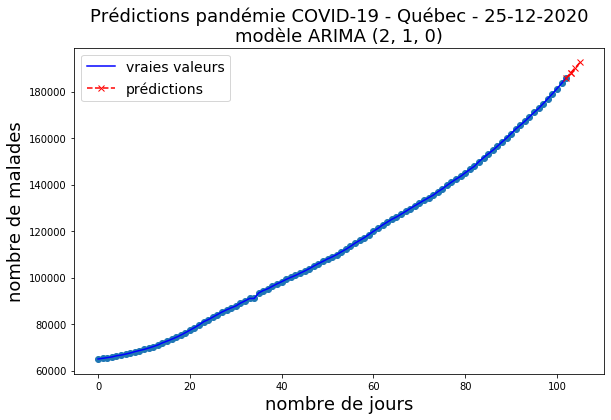

******************************************************************************************


In [49]:
from pandas import datetime
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from numpy.linalg import LinAlgError
from math import sqrt

X = series.values
X = [x for x in X if x > 0]

# Ici au besoin, on peut ajouter manuellement un nouveau point de données
# X += [3430]
taille_entrainement_data = int(len(X) * 0.66)
print("Taille du jeu de données de test=",len(X)-taille_entrainement_data)

# Séparation entre jeu de données d'entraînement et jeu de données de test
entrainement_data, test_data = X[0:taille_entrainement_data], X[taille_entrainement_data:len(X)]

predictions_ARIMA = {}
print("*"*90)

for meilleur_ARIMA in meilleurs_ARIMA:
    drapeau_erreur = False
    print("Modèle ARIMA:",meilleur_ARIMA)
    historique = [x for x in entrainement_data]
    predictions = list()
    nbr_predictions = 3
    nbr_jours_init = len(X)-len(test_data)

    for t in range(len(test_data)+nbr_predictions):
        try:
            modele_ARIMA = ARIMA(historique, order=meilleur_ARIMA)
            modele_ARIMA_entraine = modele_ARIMA.fit(disp=0)
            sortie = modele_ARIMA_entraine.forecast()
            une_prediction = sortie[0]
            predictions.append(une_prediction)
            if t < len(test_data):
                vraie_valeur = test_data[t]
                historique.append(vraie_valeur)
                print('Nombre de jours écoulés=%i, t=%i, prédiction=%i, vraie valeur=%i' % (nbr_jours_init+t,t,une_prediction,vraie_valeur))
            else:
                historique.append(une_prediction)
                print("meilleur_ARIMA",meilleur_ARIMA)
                etiq_ARIMA = "_".join([str(hyperparam) for hyperparam in meilleur_ARIMA])
                if not etiq_ARIMA in predictions_ARIMA.keys():
                    predictions_ARIMA[etiq_ARIMA]=int(une_prediction)
                print('Nombre de jours écoulés=%i, t=%i, prédiction=%i' % (nbr_jours_init+t,t,une_prediction))
        except:
            print("*** Erreur! ***")
            drapeau_erreur = True
            break
    if drapeau_erreur:
        continue
    else:   
        # Évaluation de l'erreur de prédiction
        rmse = sqrt(mean_squared_error(test_data, predictions[:-nbr_predictions]))
        print('Test RMSE: %.3f' % rmse)
        # Afficher les vraies valeurs et les prédictions pour le jeu de données de test
        plt.figure(figsize=(longueur/2,hauteur/2))
        date = (dates_list[-1]+pd.Timedelta(days=1)).strftime("%d-%m-%Y")
        plt.title(u"Prédictions pandémie COVID-19 - Québec - " + date + "\n" + 
                  "modèle ARIMA (" + etiq_ARIMA.replace("_",", ") + ")",fontsize=18)
        x_data = list(range(len(test_data)))
        x_data_extension = list(range(len(test_data)+nbr_predictions))[-nbr_predictions:]
        plt.scatter(x_data,test_data)
        plt.plot(test_data,color='blue',label="vraies valeurs")
        plt.plot(x_data_extension[-nbr_predictions:],
                 predictions[-nbr_predictions:],
                 "r--",marker="x",label="prédictions")
        point1 = [x_data[-1], test_data[-1]]
        point2 = [x_data_extension[0],int(predictions[-nbr_predictions])]
        x_values = [point1[0], point2[0]]
        y_values = [point1[1], point2[1]]
        plt.plot(x_values, y_values,"r--",marker="x")
        plt.legend(loc='best',fontsize=14)
        plt.xlabel("nombre de jours",fontsize=18)
        plt.ylabel("nombre de malades",fontsize=18)
        plt.show()
        print("*"*90)
        break

### Afficher les vraies valeurs et la prédiction pour demain

#### Modèle meilleurs ARIMA seulement

In [50]:
prediction_regNonLin_exp = 0

In [51]:
# Composante du modèle exponentiel
ponderation_exp = 0
total_predictions = prediction_regNonLin_exp * ponderation_exp
#total_predictions = 0 
print("Prédictions régr. non-lin.: ",prediction_regNonLin_exp)
for etiq_ARIMA in predictions_ARIMA.keys():
    print("Prédictions ARIMA: (" + etiq_ARIMA.replace("_",", ") + ") : " + str(predictions_ARIMA[etiq_ARIMA]))
    total_predictions += predictions_ARIMA[etiq_ARIMA]
print("Prédictions pour "+(dates_list[-1]+pd.Timedelta(days=1)).strftime("%d-%m-%Y"))
# Modèle exponentiel utilisé avant le 1er avril 2020
# ligne commentée
prediction_pur_ARIMA = int(total_predictions/(len(predictions_ARIMA)+1*ponderation_exp))
print(" => ",prediction_pur_ARIMA," <= ")
#print(" => ",int(total_predictions/len(predictions_ARIMA))," <= ")


Prédictions régr. non-lin.:  0
Prédictions ARIMA: (2, 1, 0) : 188107
Prédictions pour 25-12-2020
 =>  188107  <= 


### Afficher les vraies valeurs et la prédiction pour demain

#### Modèle meilleurs ARIMA

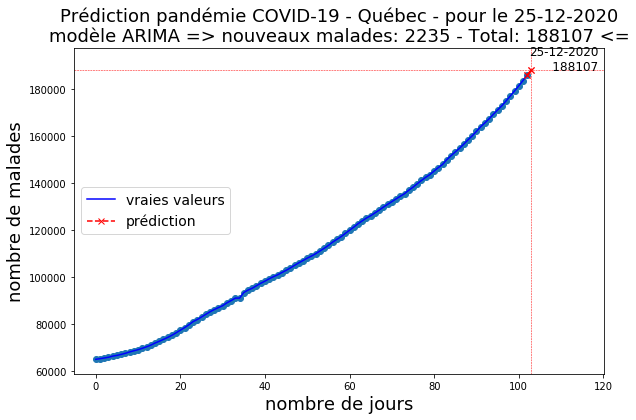

In [52]:
plt.figure(figsize=(longueur/2,hauteur/2))
date_demain = (dates_list[-1]+pd.Timedelta(days=1)).strftime("%d-%m-%Y")
prediction_demain = prediction_pur_ARIMA
x_data = list(range(len(test_data)))
x_data_extension = list(range(len(test_data)+nbr_predictions))[-nbr_predictions:]
plt.scatter(x_data,test_data)
plt.plot(test_data,color='blue',label="vraies valeurs")
point1 = [x_data[-1], test_data[-1]]
point2 = [x_data_extension[0],prediction_demain]
x_values = [point1[0], point2[0]]
y_values = [point1[1], point2[1]]
plt.plot(x_values, y_values,"r--",marker="x",label="prédiction")
plt.axhline(prediction_demain,linestyle='--',linewidth=0.5,color='r')
plt.axvline(x=point2[0],linestyle='--',linewidth=0.5,color='r')
plt.text(point2[0]-0.5, point2[1], date_demain + "\n" +" "*6 + str(prediction_demain),fontsize=12)
plt.plot(x_values, y_values,"r--",marker="x")
xlim(right=point2[0]+x_values[-1]/6)
ylim(top=point2[1]+y_values[-1]/20)
plt.legend(loc='best',fontsize=14)
plt.xlabel("nombre de jours",fontsize=18)
plt.ylabel("nombre de malades",fontsize=18)
plt.title(u"Prédiction pandémie COVID-19 - Québec - pour le " + date_demain + "\n" + 
          "modèle ARIMA => nouveaux malades: " + str(prediction_demain-test_data[-1]) + " - Total: "+ str(prediction_demain) + " <=",fontsize=18)
plt.savefig('images/Prediction-ARIMA_seul-COVID19-Quebec.png')
plt.show()
